In [75]:
from numpy import random as rd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.family'] = 'Garamond'
plt.rcParams['font.size'] = 20
sns.set_theme(context="notebook")
# sns.set_style("dark")

from tqdm import tqdm
# import scipy.io
# dados = scipy.io.loadmat('C:/Users/alexa/Desktop/sync/NIAS_online/IC21/bd/Ab50dB.mat')
# print(len(dados))

In [42]:
import h5py
a = h5py.File('C:/Users/alexa/Desktop/sync/NIAS_online/IC21/bd/Ab50dB.mat', 'r')
x = a['x']
print(x.shape)

(16, 301, 1000)


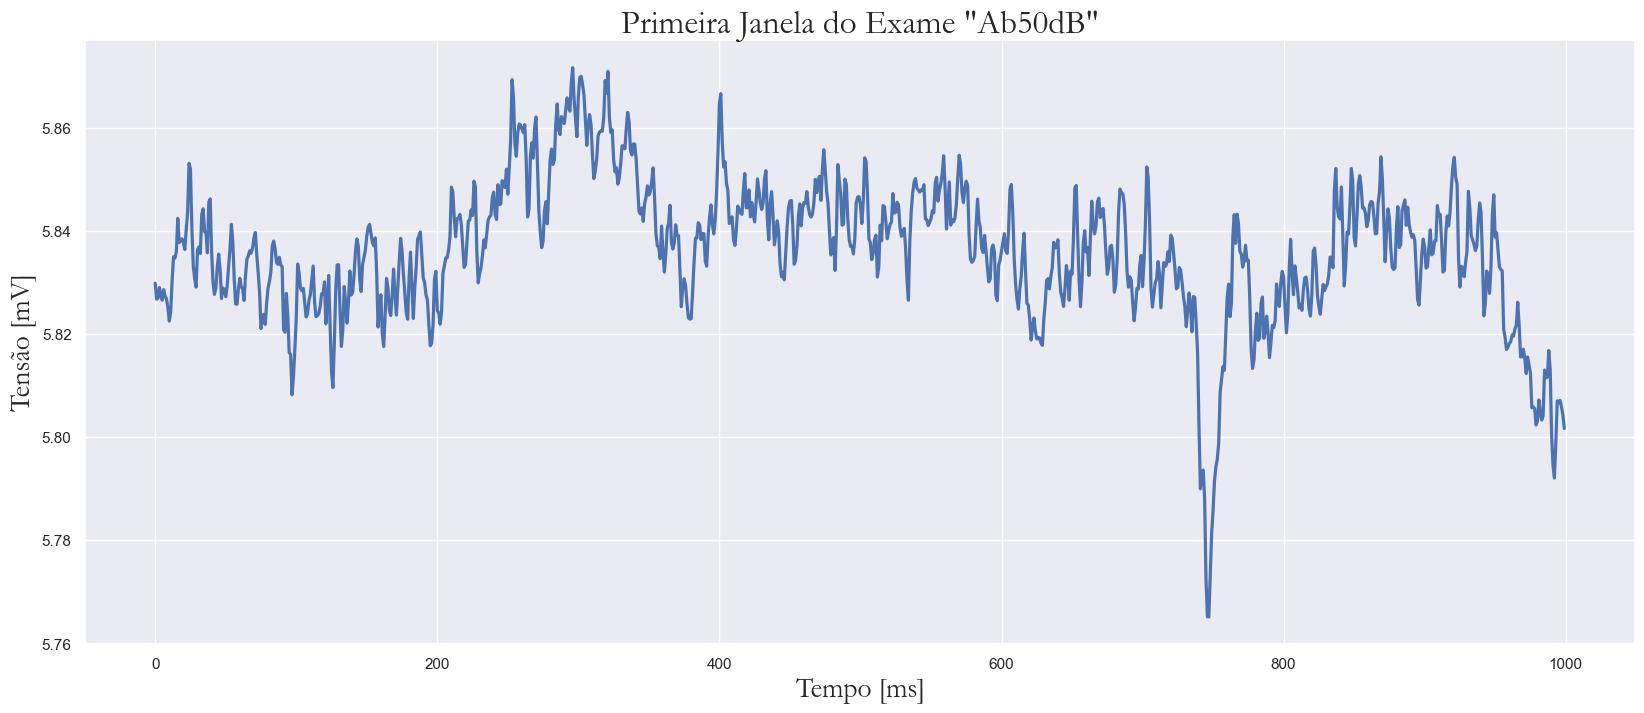

In [88]:
sns.lineplot(data = x[0,1,0:1000]*1000, linewidth= 2.3);
plt.title('Primeira Janela do Exame "Ab50dB"',fontsize=24, fontfamily='Garamond');
plt.ylabel('Tensão [mV]',fontsize=20, fontfamily='Garamond');
plt.xlabel('Tempo [ms]',fontsize=20, fontfamily='Garamond');

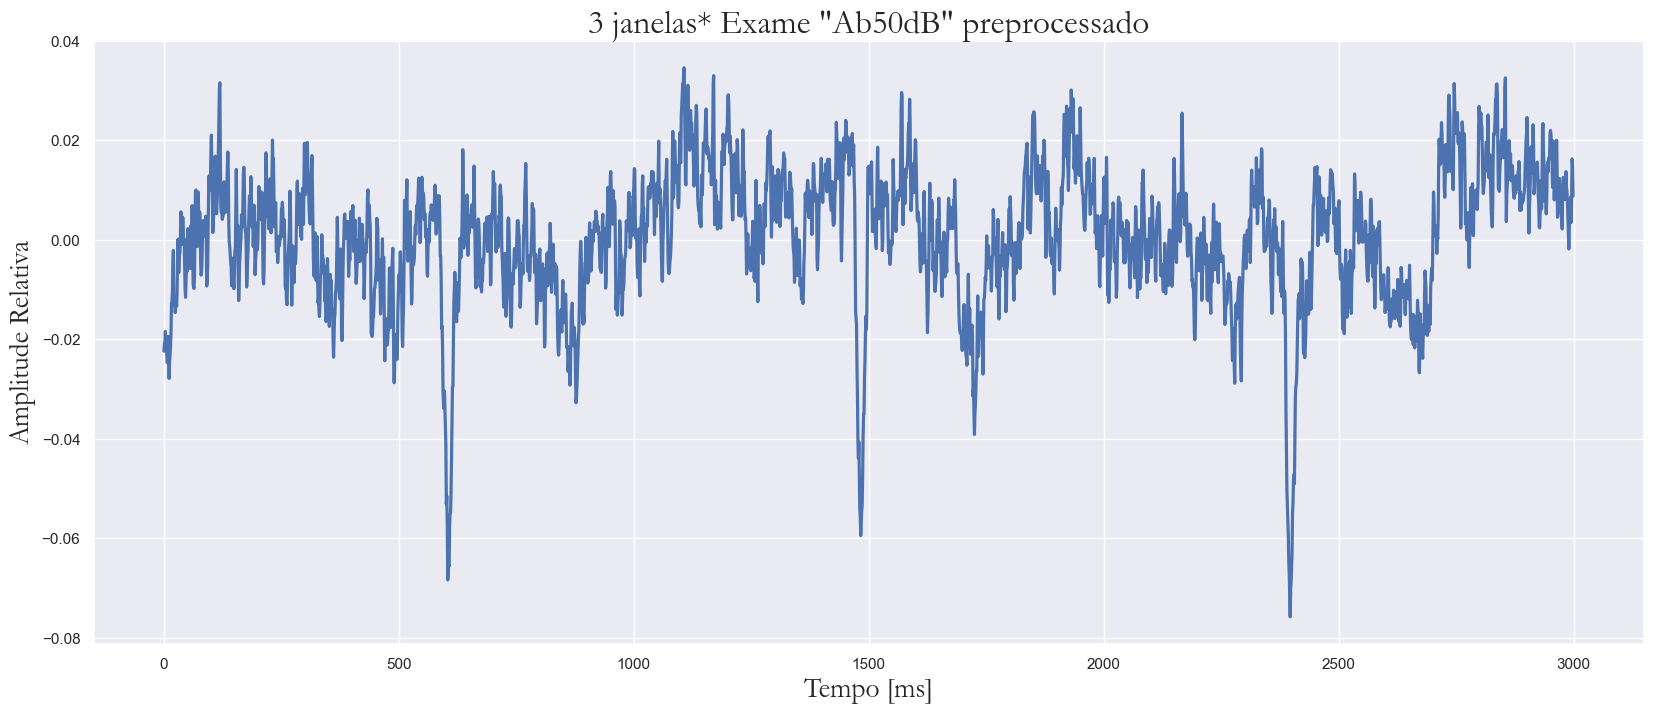

In [115]:
x2 = np.reshape(x, (16,x.shape[1]*x.shape[2]))
x2 = x2-np.mean(np.mean(x2,axis = 1))
sns.lineplot(data = x2[0,2001:5001]*1000, linewidth= 2.3);
plt.title('3 janelas* Exame "Ab50dB" preprocessado',fontsize=24, fontfamily='Garamond');
plt.ylabel('Amplitude Relativa',fontsize=20, fontfamily='Garamond');
plt.xlabel('Tempo [ms]',fontsize=20, fontfamily='Garamond');

In [111]:
pico = np.max(abs(x2),axis=1)
print(pico)
pico>1/2000

[0.00013895 0.00011526 0.00011531 0.00011534 0.00019883 0.00011776
 0.00013169 0.0001538  0.00011338 0.00014701 0.00018494 0.00014741
 0.00017139 0.00021164 0.00017993 0.00017544]


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [227]:
xx.shape

(16, 200, 1000)

In [228]:
xx2.shape

(16, 200000)

Exame Ab


Simulando: 100%|██████████| 60/60 [00:00<00:00, 6001.15it/s]


Exame An


Simulando: 100%|██████████| 60/60 [00:00<00:00, 13089.47it/s]


Exame Bb


Simulando: 100%|██████████| 60/60 [00:00<00:00, 9284.91it/s]


Exame Er


Simulando: 100%|██████████| 60/60 [00:00<00:00, 11998.01it/s]


Exame Lu


Simulando: 100%|██████████| 60/60 [00:00<00:00, 9988.02it/s]


Exame So


Simulando: 100%|██████████| 60/60 [00:00<00:00, 7504.12it/s]


Exame Qu


Simulando: 100%|██████████| 60/60 [00:00<00:00, 11991.72it/s]


Exame Vi


Simulando: 100%|██████████| 60/60 [00:00<00:00, 15028.86it/s]


Exame Sa


Simulando: 100%|██████████| 60/60 [00:00<00:00, 19990.33it/s]


Exame Ti


Simulando: 100%|██████████| 60/60 [00:00<00:00, 12873.86it/s]


Exame Wr


Simulando: 100%|██████████| 60/60 [00:00<00:00, 7431.44it/s]


Para M = 120, temos FP = 0.0%


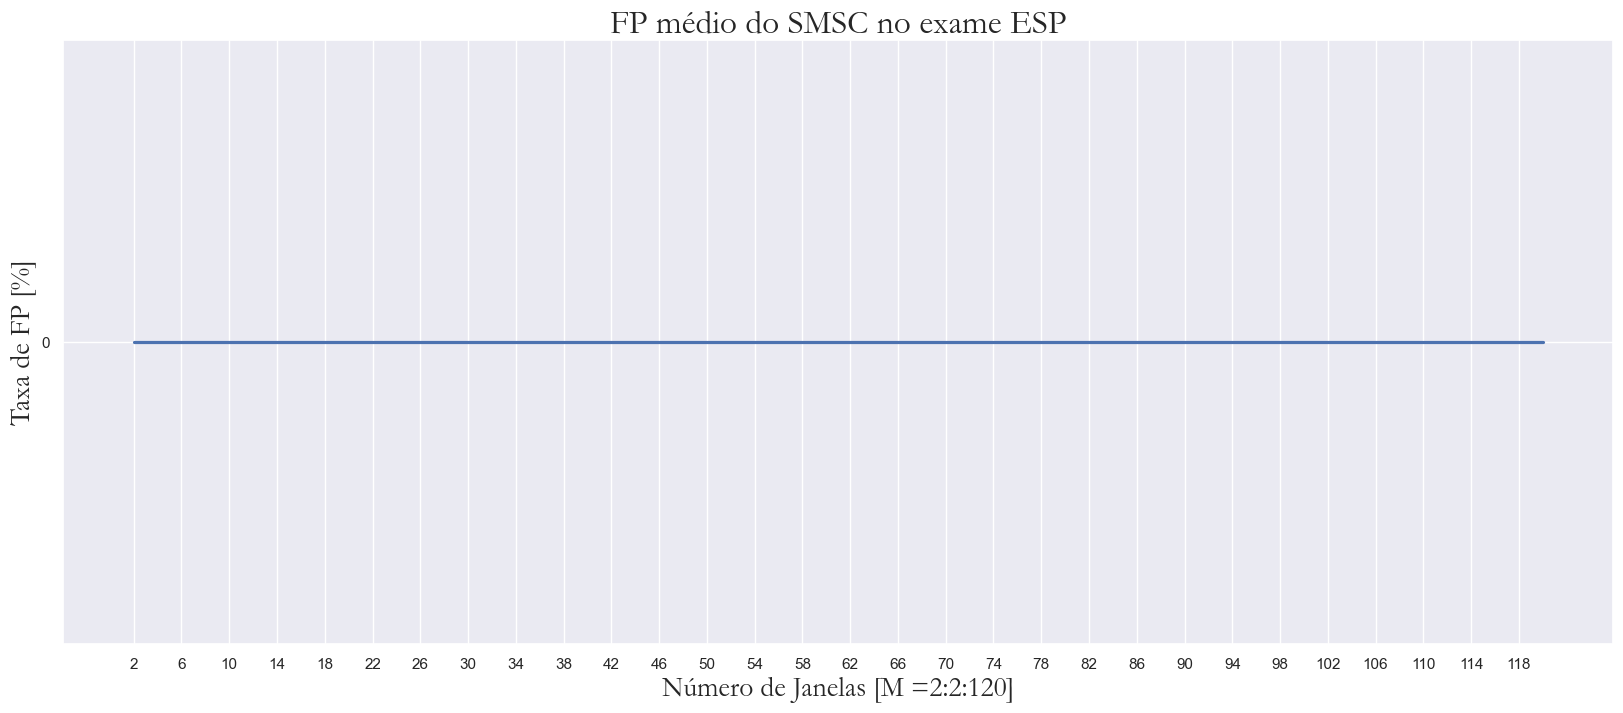

In [250]:
# Testes SMSC médio
## Dados
from scipy.fft import fft
exames = ['Ab','An','Bb','Er','Lu','So','Qu','Vi','Sa','Ti','Wr']
i=0

for ex in exames:
    caminho = 'C:/Users/alexa/Desktop/sync/NIAS_online/IC21/bd/'+str(ex)+'ESP.mat'
    x = h5py.File(caminho, 'r')['x']
    Fs = h5py.File(caminho, 'r')['Fs'] # alguns estão em 1750 Hz
    x2 = np.reshape(x, (16,x.shape[1]*x.shape[2]))
    x2 = x2-np.mean(np.mean(x2,axis = 1))

    print('Exame', ex)
    # print(xx.shape)

    ## Parâmetros
    Mmin = 2
    Mmax = 122 # xx.shape[-1]
    Mstep = 2
    listaMs = np.arange(Mmin, Mmax, step=Mstep)
    probDetecT = np.zeros((len(exames),len(listaMs)))

    ## Testes
    for j in tqdm(range(0,len(listaMs)), desc = 'Simulando'):
        M = int(listaMs[j])
        limiar = 1-(5/100)**(1/(M-1))

        SINAL = fft(x2[1,0:M])

        # Calcula MSC:
        ORD = (np.abs(np.sum(SINAL,axis=0))**2) / (M*np.sum(np.abs(SINAL)**2,axis=0))
        probDetecT[i,j] = np.sum(ORD>limiar)/M

    # print('Menor FP:',np.round(probDetecT[i,-1]*100,2),'\b%')
    i+=1

sns.lineplot(x=listaMs,y = np.mean(probDetecT,axis=0)*100, linewidth= 2.3);
plt.title('FP médio do SMSC no exame ESP',fontsize=24, fontfamily='Garamond');

plt.xticks(np.arange(np.min(listaMs),np.max(listaMs),4))
plt.yticks(np.arange(np.min(np.mean(probDetecT,axis=0)*100),np.max(np.mean(probDetecT,axis=0)*100)+0.5,0.5))

plt.ylabel('Taxa de FP [%]',fontsize=20, fontfamily='Garamond');
plt.xlabel('Número de Janelas [M =2:2:120]',fontsize=20, fontfamily='Garamond');

print('Para M = 120, temos FP =',np.round(np.min(np.mean(probDetecT,axis=0)*100),2),'\b%')

In [181]:
# Simulação Monte Carlo testes MSC sequenciais NDC
## Parâmetros
nSim = int(1e6) # num. de simulações (sen+ruido=>ord=>detecção?)
N = int(1e6) # num. de pontos na senóide
energia_ruido = 1 # usado frequentemente: 1/16
SNRi = 50 # dB
Mmin = 2
Mmax = 120
Mstep = 2
listaMs = np.arange(Mmin, Mmax, Mstep)
probDetec = np.zeros(len(listaMs))


for j in tqdm(range(0,len(listaMs)), desc = 'Simulando'):
    nd = 0
    M = int(listaMs[j])
    limiar = 1-(5/100)**(1/(M-1))
    SNRd = 10**(SNRi/10)

    # Soma ruido aleatório novo à senóide inicial, em cada simulação:      
    # SINAL = np.sqrt(2*(energia_ruido**2)*SNRd) +rd.randn(M,nSim) +1j*rd.randn(M,nSim)
    SINAL = x

    # Calcula MSC:
    ORD = (np.abs(np.sum(SINAL,axis=0))**2) / (M*np.sum(np.abs(SINAL)**2,axis=0))
    probDetec[j] = np.sum(ORD>limiar)/nSim

    # print('Probabilidade de detecção atingida:', (np.sum(ORD>limiar)/nSim)*100,'\b%')

Simulando: 100%|██████████| 59/59 [00:28<00:00,  2.09it/s]
